# Identifying Entities in Healthcare Data

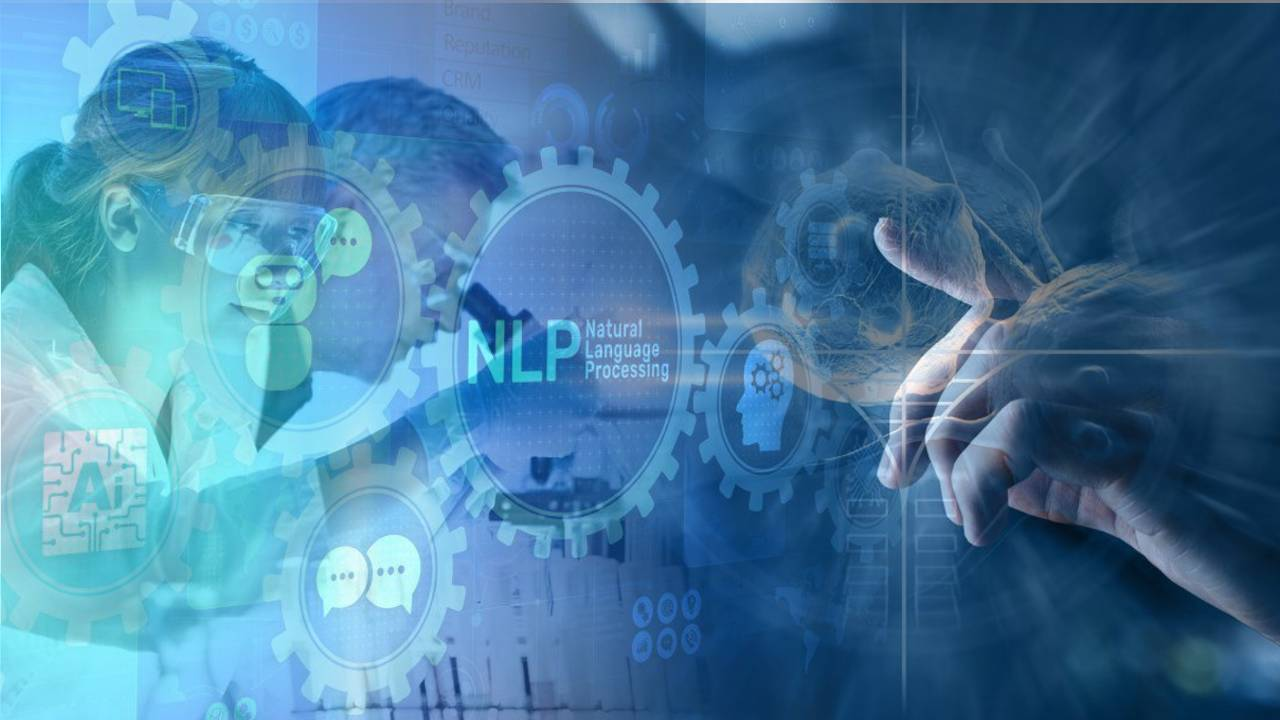

### <font color='brown'>Problem Statement</font>
Let us consider a hypothetical example of a health tech company called ‘BeHealthy’. Suppose ‘BeHealthy’ aims to connect the medical communities with millions of patients across the country. 

‘BeHealthy’ has a web platform that allows doctors to list their services and manage patient interactions and provides services for patients such as booking interactions with doctors and ordering medicines online. Here, doctors can easily organise appointments, track past medical records and provide e-prescriptions.

So, companies like ‘BeHealthy’ are providing medical services, prescriptions and online consultations and generating huge data day by day.

Let’s take a look at the following snippet of medical data that may be generated when a doctor is writing notes to his/her patient or as a review of a therapy that he or she has done.

<b>“The patient was a 62-year-old man with squamous cell lung cancer, which was first successfully treated by a combination of radiation therapy and chemotherapy.”</b>

As you can see in this text, a person with a non-medical background cannot understand the various medical terms. We have taken a simple sentence from a medical data set to understand the problem and where you can understand the terms ‘cancer’ and ‘chemotherapy’. 

Suppose you have been given such a data set in which a lot of text is written related to the medical domain. As you can see in the dataset, there are a lot of diseases that can be mentioned in the entire dataset and their related treatments are also mentioned implicitly in the text, which you saw in the aforementioned example that the disease mentioned is cancer and its treatment can be identified as chemotherapy using the sentence.

<i>But, note that it is not explicitly mentioned in the dataset about the diseases and their treatment, but somehow, you can build an algorithm to map the diseases and their respective treatment.</i>

Suppose you have been asked to determine the disease name and its probable treatment from the dataset and list it out in the form of a table or a dictionary like this.

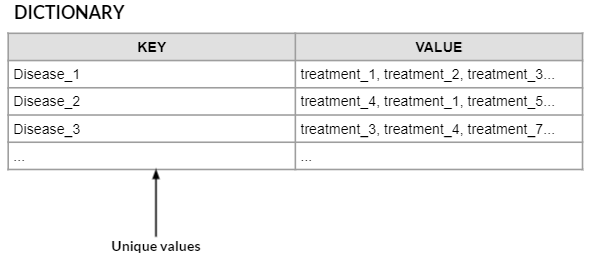

##Workspace set up: Import and Install useful packages.

In [ ]:
!pip install pycrf
!pip install sklearn-crfsuite

import spacy
import sklearn_crfsuite
from sklearn_crfsuite import metrics

model = spacy.load("en_core_web_sm")

##Data Preprocessing

The dataset provided is in the form of one word per line. Let's understand the format of data below:
- Suppose there are *x* words in a sentence, then there will be *x* continuous lines with one word in each line. 
- Further, the two sentences are separated by empty lines. The labels for the data follow the same format.

**We need to pre-process the data to recover the complete sentences and their labels.**


### Construct the proper sentences from individual words and print the 5 sentences.

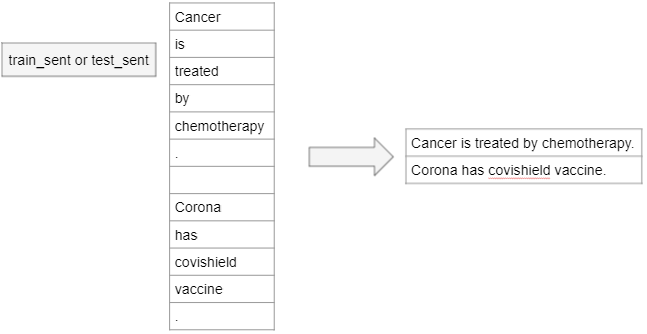

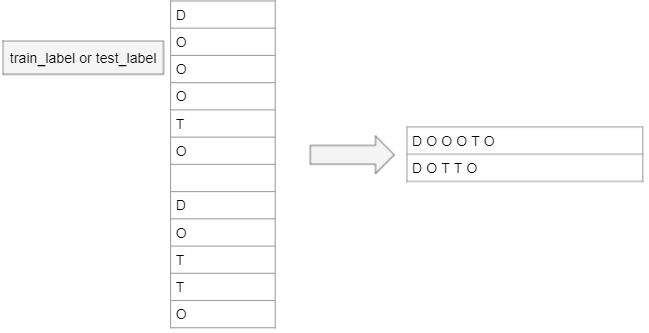

#### Let us download the dataset from the google drive

In [ ]:
# Download the train_sent and train_label dataset files from my google drive to colab
! gdown --id 1ZFQ4nDmVS7m239sOrcOiyVH5QbZEMIQi
! gdown --id 1dmcWWx3s8Yf4scWNSmCPSOgsSx9Pbef9

Downloading...
From: https://drive.google.com/uc?id=1ZFQ4nDmVS7m239sOrcOiyVH5QbZEMIQi
To: /content/train_sent
100% 302k/302k [00:00<00:00, 137MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dmcWWx3s8Yf4scWNSmCPSOgsSx9Pbef9
To: /content/train_label
100% 94.4k/94.4k [00:00<00:00, 97.7MB/s]


In [ ]:
# Download the test_sent and test_label dataset files from my google drive to colab
! gdown --id 12AV3Hy5V4jxDmnZT3WOEUn3B6lnbtdhP
! gdown --id 1l86xueonkQKpXuV7YEeqOqmsR0VRFLGe

Downloading...
From: https://drive.google.com/uc?id=12AV3Hy5V4jxDmnZT3WOEUn3B6lnbtdhP
To: /content/test_sent
100% 121k/121k [00:00<00:00, 90.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1l86xueonkQKpXuV7YEeqOqmsR0VRFLGe
To: /content/test_label
100% 38.3k/38.3k [00:00<00:00, 50.4MB/s]


In [ ]:
# Open and read the file train_sent having the sentences from the training set
with open('/content/train_sent', 'r') as train_sent_file:
  train_sentences = train_sent_file.readlines()

In [ ]:
# Similarly open and read the file train_label having the corresponding labels of the training set
with open('/content/train_label', 'r') as train_label_file:
  train_sent_labels = train_label_file.readlines()

In [ ]:
# Define a function to process the words and form a sentence
def form_sentence(data):
  target_list=[]
  sent=""
  for word in data:
    if(word=='\n'):
      target_list.append(sent)
      sent=""
    else:
      sent+=word.strip()+" "
  return target_list

In [ ]:
# Encodings for color and format of string to format our output (only for beautfying purpose)
GREEN = '\033[92m'
BLUE = '\033[94m'
RED = '\033[1;91m'
BOLD = '\033[1m'
END = '\033[0m'

message = BOLD+BLUE+"The number of sentences in the {0} dataset are: "+END+BOLD+GREEN+"{1}"+END
formatted_message = BOLD+BLUE+"{0}"+END+BOLD+GREEN+"{1}"+END
prediction_message = BOLD+"The treatment for disease"+END+BOLD+RED+ " {0} "+END+" is "+BOLD+GREEN+"{1}"+END
message_not_found = "The disease"+RED+" {0} "+END+"not found in the predicted list"

In [ ]:
# Let us declare 2 lists to store the processed sentences and corresponding labels
train_sent=[]
train_labels =[]
train_sent = form_sentence(train_sentences)
train_labels = form_sentence(train_sent_labels)

In [ ]:
# Open and read the file test_sent having the sentences from the testing set
with open('/content/test_sent', 'r') as test_sent_file:
  test_sentences = test_sent_file.readlines()

In [ ]:
# Similarly open and read the file train_label having the corresponding labels of the testing set
with open('/content/test_label', 'r') as test_label_file:
  test_sent_labels = test_label_file.readlines()

In [ ]:
# Let us declare 2 lists to store the processed sentences and corresponding labels for test sentences
test_sent=[]
test_labels =[]
test_sent = form_sentence(test_sentences)
test_labels = form_sentence(test_sent_labels)

In [ ]:
# let us print the first 5 sentences of train sentences
for sent in train_sent[0:5]:
  print(sent)

All live births > or = 23 weeks at the University of Vermont in 1995 ( n = 2395 ) were retrospectively analyzed for delivery route , indication for cesarean , gestational age , parity , and practice group ( to reflect risk status ) 
The total cesarean rate was 14.4 % ( 344 of 2395 ) , and the primary rate was 11.4 % ( 244 of 2144 ) 
Abnormal presentation was the most common indication ( 25.6 % , 88 of 344 ) 
The `` corrected '' cesarean rate ( maternal-fetal medicine and transported patients excluded ) was 12.4 % ( 273 of 2194 ) , and the `` corrected '' primary rate was 9.6 % ( 190 of 1975 ) 
Arrest of dilation was the most common indication in both `` corrected '' subgroups ( 23.4 and 24.6 % , respectively ) 


In [ ]:
# let us print the first 5 corresponding labels of train sentences
for sent in train_labels[0:5]:
  print(sent)

O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O 
O O O O O O O O O O O O O O O O O O O O O O O O O 
O O O O O O O O O O O O O O O 
O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O 
O O O O O O O O O O O O O O O O O O O O O O 


In [ ]:
# let us print the first 5 sentences of test sentences
for sent in test_sent[0:5]:
  print(sent)

Furthermore , when all deliveries were analyzed , regardless of risk status but limited to gestational age > or = 36 weeks , the rates did not change ( 12.6 % , 280 of 2214 ; primary 9.2 % , 183 of 1994 ) 
As the ambient temperature increases , there is an increase in insensible fluid loss and the potential for dehydration 
The daily high temperature ranged from 71 to 104 degrees F and AFI values ranged from 1.7 to 24.7 cm during the study period 
There was a significant correlation between the 2- , 3- , and 4-day mean temperature and AFI , with the 4-day mean being the most significant ( r = 0.31 , p & # 60 ; 0.001 ) 
Fluctuations in ambient temperature are inversely correlated to changes in AFI 


In [ ]:
# let us print the first 5 corresponding labels of test sentences
for sent in test_labels[0:5]:
  print(sent)

O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O 
O O O O O O O O O O O O O O O O O O O 
O O O O O O O O O O O O O O O O O O O O O O O O 
O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O 
O O O O O O O O O O O 


### Count the number of sentences in the processed train and test dataset 

In [ ]:
# Print the count of sentences in the train_sent and test_sent
print(message.format("train", len(train_sent)))
print(message.format("test", len(test_sent)))

The number of sentences in the train dataset are: 2599
The number of sentences in the test dataset are: 1056


### Count the number of lines of labels in the processed train and test dataset.

In [ ]:
# Print the count of sentences in the train_labels and test_labels
print(message.format("train label",len(train_labels)))
print(message.format("test label",len(test_labels)))

The number of sentences in the train label dataset are: 2599
The number of sentences in the test label dataset are: 1056


##Concept Identification

We will first explore what are the various concepts present in the dataset. For this, we will use PoS Tagging. 



### Extract those tokens which have NOUN or PROPN as their PoS tag and find their frequency

In [ ]:
# Print the count of sentences in each set and combined set
print("Train_sent: ",len(train_sent))
print("Test_sent: ",len(test_sent))
all_sent = train_sent.copy()
all_sent.extend(test_sent)
print("The total number of sentences combined from train and  test sentences dataset are {0}".format(len(all_sent)))

Train_sent:  2599
Test_sent:  1056
The total number of sentences combined from train and  test sentences dataset are 3655


In [ ]:
# Find the total count of 'NOUN' and 'PROPN' in the train and test data combined and store in dictionary
token_pos={"TOKEN":[], "POSTAG":[]}
for doc in all_sent:
  processed_doc = model(doc)
  for token in processed_doc:
    if(token.pos_ in ["NOUN", "PROPN"] ):
      token_pos["TOKEN"].append(token.text)
      token_pos["POSTAG"].append(token.pos_)
      #print(token.text," : ", token.pos_)

In [ ]:
# Import pandas and create a pandas dataframe from the token_pos dictionary object
import pandas as pd
df = pd.DataFrame(token_pos)

In [ ]:
# Let us print the total count of NOUN and PROPN
print(df['POSTAG'].value_counts())
print(formatted_message.format("The total count of NOUN are: ", df['POSTAG'].value_counts()[0]))
print(formatted_message.format("The total count of PROPN are: ",df['POSTAG'].value_counts()[1]))

NOUN     19776
PROPN     4551
Name: POSTAG, dtype: int64
The total count of NOUN are: 19776
The total count of PROPN are: 4551


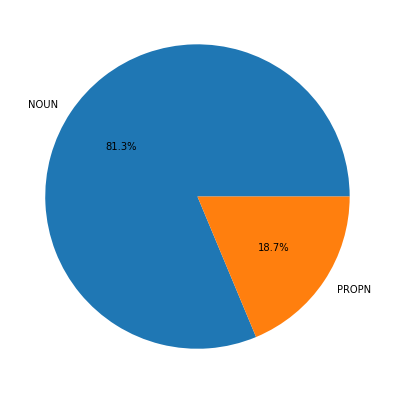

In [ ]:
# Plot a pie chart for visually displaying the NOUN and PROPN count in percentage
import matplotlib.pyplot as plt
import seaborn as sns
data = [df['POSTAG'].value_counts()[0],df['POSTAG'].value_counts()[1]]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = ["NOUN","PROPN"], autopct='%.1f%%')
plt.show()

### Print the top 25 most common tokens with NOUN or PROPN PoS tags

In [ ]:
# Print the top 25 most common tokens with NOUN or PROPN PoS tags
df['TOKEN'].value_counts().head(25)

patients        491
treatment       281
%               247
cancer          200
therapy         175
study           153
disease         141
cell            140
lung            116
group            94
chemotherapy     88
gene             87
effects          85
results          79
women            77
use              75
surgery          71
cases            71
risk             71
analysis         70
rate             67
response         66
survival         65
children         64
effect           63
Name: TOKEN, dtype: int64

In [ ]:
# Get the top 25 tokens for plotting bar graph for visualization
top_25_tokens = pd.DataFrame(df['TOKEN'].value_counts().head(25))

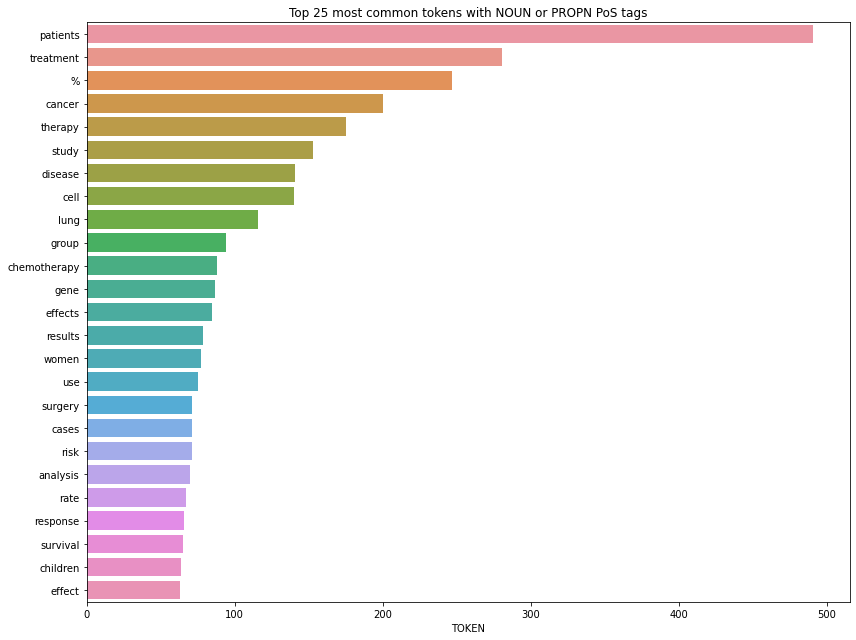

In [ ]:
# Plot the top 25 most common tokens with NOUN or PROPN PoS tags
plt.figure(figsize=(12, 9))
sns.barplot(x ='TOKEN',
            y = top_25_tokens.index,
            data = top_25_tokens)
plt.title('Top 25 most common tokens with NOUN or PROPN PoS tags')
plt.tight_layout()
plt.show()

## Defining features for CRF





In [ ]:
# Define a function to get the list of POS tags
def get_pos(sentence):
  pos_list=[]
  processed_sent = model(sentence)
  for token in processed_sent:
    pos_list.append(token.pos_)
  return pos_list

In [ ]:
# Let's define the features to get the feature value for one word.
def getFeaturesForOneWord(sentence, pos, pos_list):
  word = sentence[pos]

  features = [
    'word.pos=' + pos_list[pos],
    'word.lower=' + word.lower(), # serves as word id
    'word[-3:]=' + word[-3:],     # last three characters
    'word[:3]=' + word[:3],     # first three characters
    'word.isupper=%s' % word.isupper(),  # is the word in all uppercase
    'word.isdigit=%s' % word.isdigit(),  # is the word a number
    'words.startsWithCapital=%s' % word[0].isupper() # is the word starting with a capital letter
  ]
 
  if(pos > 0):
    prev_word = sentence[pos-1]
    features.extend([
    'prev_word.pos=' + pos_list[pos-1],
    'prev_word.lower=' + prev_word.lower(), 
    'prev_word.isupper=%s' % prev_word.isupper(),
    'prev_word.isdigit=%s' % prev_word.isdigit(),
    'prev_words.startsWithCapital=%s' % prev_word[0].isupper()
  ])
  else:
    features.append('BEG') # feature to track begin of sentence 
 
  if(pos == len(sentence)-1):
    features.append('END') # feature to track end of sentence
 
  return features


## Getting the features

### Write a code/function to get the features for a sentence

In [ ]:
# Write a code to get features for a sentence.
def getFeaturesForOneSentence(sentence, pos_list):
  sentence_list = sentence.split()
  return [getFeaturesForOneWord(sentence_list, pos,pos_list) for pos in range(len(sentence_list))]

### Write a code/function to get the labels of a sentence

In [ ]:
# Define a function to get the labels for a sentence.
def getLabelsInListForOneSentence(labels):
  return labels.split()

## Define input and target variables


Correctly computing X and Y sequence matrices for training and test data.
Check that both sentences and labels are processed

### Define the features' values for each sentence as input variable  for CRF model in test and the train dataset 

In [ ]:
X_train = [getFeaturesForOneSentence(sentence, get_pos(sentence)) for sentence in train_sent]
X_test = [getFeaturesForOneSentence(sentence,  get_pos(sentence)) for sentence in test_sent]

### Define the labels as the target variable for test and the train dataset

In [ ]:
Y_train = [getLabelsInListForOneSentence(labels) for labels in train_labels]
Y_test = [getLabelsInListForOneSentence(labels) for labels in test_labels]

In [ ]:
# Let us check how the feature looks like for any one item
X_train[1]

[['word.pos=DET',
  'word.lower=the',
  'word[-3:]=The',
  'word[:3]=The',
  'word.isupper=False',
  'word.isdigit=False',
  'words.startsWithCapital=True',
  'BEG'],
 ['word.pos=ADJ',
  'word.lower=total',
  'word[-3:]=tal',
  'word[:3]=tot',
  'word.isupper=False',
  'word.isdigit=False',
  'words.startsWithCapital=False',
  'prev_word.pos=DET',
  'prev_word.lower=the',
  'prev_word.isupper=False',
  'prev_word.isdigit=False',
  'prev_words.startsWithCapital=True'],
 ['word.pos=ADJ',
  'word.lower=cesarean',
  'word[-3:]=ean',
  'word[:3]=ces',
  'word.isupper=False',
  'word.isdigit=False',
  'words.startsWithCapital=False',
  'prev_word.pos=ADJ',
  'prev_word.lower=total',
  'prev_word.isupper=False',
  'prev_word.isdigit=False',
  'prev_words.startsWithCapital=False'],
 ['word.pos=NOUN',
  'word.lower=rate',
  'word[-3:]=ate',
  'word[:3]=rat',
  'word.isupper=False',
  'word.isdigit=False',
  'words.startsWithCapital=False',
  'prev_word.pos=ADJ',
  'prev_word.lower=cesarean',
  

## Build the CRF Model

In [ ]:
# Build the CRF model.
crf = sklearn_crfsuite.CRF(max_iterations=200)

<font color='red'><b>PLEASE NOTE:-</b> The crf.fit will throw an error if the sklearn version is 24.0 or above. To run the crf.fit method we either need to downgrade the sklearn version or as a workaround we can use try and except. try and except works well by ignoring the AttributeError but is not a recommended approach. But in case of constratint and challenges of version mismatch this can be one of the workaround.
I had to downgrade the sklearn version to version 0.23.1 to use this method.</font>

In [ ]:
# Run this code if your system has sklearn version lower than 24.0 else wrap with try 
# and except as a workaround as given in next cell
crf.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CRF(keep_tempfiles=None, max_iterations=200)

In [ ]:
# uncomment and use this as a workaround if it throws AttributeError due to version mismatch
#try:
    #crf.fit(X_train, Y_train)
#except AttributeError:
    #pass

## Evaluation

### Predict the labels of each of the tokens in each sentence of the test dataset that has been pre processed earlier.

In [ ]:
# Predict the labels from the test dataset
Y_pred = crf.predict(X_test)

### Calculate the f1 score using the actual labels and the predicted labels of the test dataset.

In [ ]:
# Calculate and print the f1 score
print(formatted_message.format("The f1 score is ",metrics.flat_f1_score(Y_test, Y_pred, average='weighted')))

The f1 score is 0.9166816091477993


##Identifying Diseases and Treatments using Custom NER

We now use the CRF model's prediction to prepare a record of diseases identified in the corpus and treatments used for the diseases.



### Create the logic to get all the predicted treatments (T) labels corresponding to each disease (D) label in the test dataset.

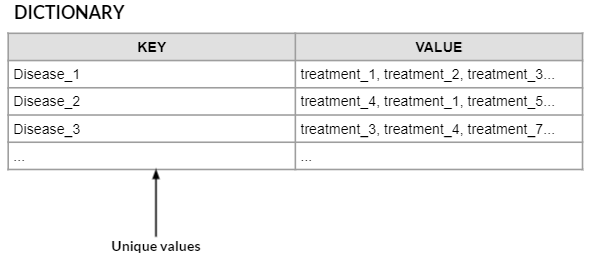

In [ ]:
# Let us create a class DiseaseTreatment that will have funtionalities for mapping and displaying disease with treatments
class DiseaseTreatment:
  def __init__(self, data):# constructor
    self.disease_treatment = {}
    for index, sentence in enumerate(data):
        disease = []
        treatment = []
        for word_index, word in enumerate(sentence):
            if(word=='D'):
                disease.append(test_sent[index].split()[word_index])
            if(word=='T'):
                treatment.append(test_sent[index].split()[word_index])
        if(len(disease)>0 and len(treatment)>0):
          self.disease_treatment[' '.join(disease)] = treatment
    
  def get_dtList(self): # get the list of disease treatments
      return self.disease_treatment

  def predict_treatment(self, disease): # method to perdict the treatment of disease
    predicted="";
    try: # handle the KeyError if the disease not found in the list
     predicted = self.disease_treatment[disease]
     print(prediction_message.format(disease, ' '.join(predicted)))
    except KeyError:
      print(message_not_found.format(disease))

  def displayTable(self): # method to display the key value pairs for disease and treatments
    return pd.DataFrame({"Keys":list(self.disease_treatment.keys()),"Values":self.disease_treatment.values()})



In [ ]:
# Instantiate the DiseaseTreatment class
dt = DiseaseTreatment(Y_pred)

In [ ]:
# Get the dataframe for the disease and treatment mapping
dt_mapping = dt.displayTable()
dt_mapping.head()

,Keys,Values
0,nonimmune hydrops fetalis,[Trisomy]
1,hereditary retinoblastoma,[radiotherapy]
2,myocardial infarction,"[aspirin, ,, 3, mg, warfarin, with, 80, mg, as..."
3,unstable angina or non-Q-wave myocardial infar...,[roxithromycin]
4,coronary-artery disease,"[Antichlamydial, antibiotics]"


In [ ]:
# format the Values column and display the top 20 rows for disease and treatments mapping
dt_mapping["Values"] = dt_mapping["Values"].apply(lambda x:' , '.join(x))
dt_mapping.head(20)

,Keys,Values
0,nonimmune hydrops fetalis,Trisomy
1,hereditary retinoblastoma,radiotherapy
2,myocardial infarction,"aspirin , , , 3 , mg , warfarin , with , 80 , ..."
3,unstable angina or non-Q-wave myocardial infar...,roxithromycin
4,coronary-artery disease,"Antichlamydial , antibiotics"
5,primary pulmonary hypertension ( PPH ),fenfluramines
6,essential hypertension,moxonidine
7,foot infection,"G-CSF , treatment"
8,hemorrhagic stroke,"double-bolus , alteplase"
9,cardiac disease,fenfluramine-phentermine


### Predict the treatment for the disease name: 'hereditary retinoblastoma'

In [ ]:
# Let us predict the treatment for disease 'hereditary retinoblastoma'
disease='hereditary retinoblastoma'
dt.predict_treatment(disease)

The treatment for disease hereditary retinoblastoma  is radiotherapy


In [ ]:
# Let us try to get prediction for disease not listed to check if it displays proper error message
disease='XYZ Unknown disease'
dt.predict_treatment(disease)

The disease XYZ Unknown disease not found in the predicted list




---
<center>End of Analysis</center>


---

